## Importing all the required Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and importing the data

In [139]:
df = pd.read_csv('Carrot_2022.csv')
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,02/02/2022,18000.0,22000.0,20000
1,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,24/02/2022,13000.0,16000.0,15000
2,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,31/01/2022,10000.0,14000.0,12000
3,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,02/02/2022,10000.0,14000.0,12000
4,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,03/02/2022,10000.0,14000.0,12000


In [140]:
df.isnull().sum()

state             0
district          0
market            0
commodity         0
variety           0
arrival_date      0
min_price       106
max_price       126
modal_price       0
dtype: int64

In [141]:
df['min_price'] = df['min_price'].fillna(value = 0)
df['max_price'] = df['max_price'].fillna(value = 0)

In [142]:
df.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [143]:
df.dtypes

state            object
district         object
market           object
commodity        object
variety          object
arrival_date     object
min_price       float64
max_price       float64
modal_price       int64
dtype: object

## Changing data types and breaking it for analysis

In [144]:
df["arrival_date"] = pd.to_datetime(df["arrival_date"])

C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/02/2022' in DD/MM/YYYY format. Provide format o

In [145]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,2022-02-02,18000.0,22000.0,20000
1,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,2022-02-24,13000.0,16000.0,15000
2,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,2022-01-31,10000.0,14000.0,12000
3,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,2022-02-02,10000.0,14000.0,12000
4,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,2022-03-02,10000.0,14000.0,12000


In [146]:
df.dtypes

state                   object
district                object
market                  object
commodity               object
variety                 object
arrival_date    datetime64[ns]
min_price              float64
max_price              float64
modal_price              int64
dtype: object

In [147]:
df['Date'] = df['arrival_date'].dt.day
df['Month'] = df['arrival_date'].dt.month
df['Year'] = df['arrival_date'].dt.year

In [148]:
df.drop(['arrival_date'], axis=1, inplace = True)

In [149]:
df.head()

,state,district,market,commodity,variety,min_price,max_price,modal_price,Date,Month,Year
0,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,18000.0,22000.0,20000,2,2,2022
1,Andaman and Nicobar,Nicobar,Car Nicobar,Carrot,Other,13000.0,16000.0,15000,24,2,2022
2,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,10000.0,14000.0,12000,31,1,2022
3,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,10000.0,14000.0,12000,2,2,2022
4,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,10000.0,14000.0,12000,2,3,2022


## Checking the relations

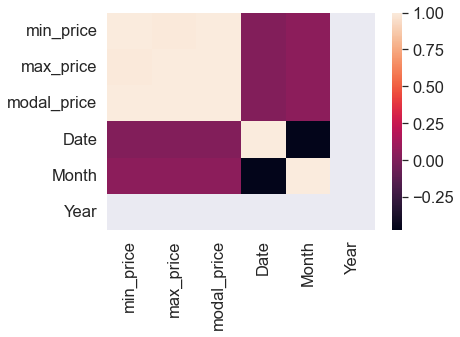

In [150]:
sns.heatmap(df.corr())
plt.show()

##### From the heat map above, I realised that minimum price, maximum price and modal price are very closely related.

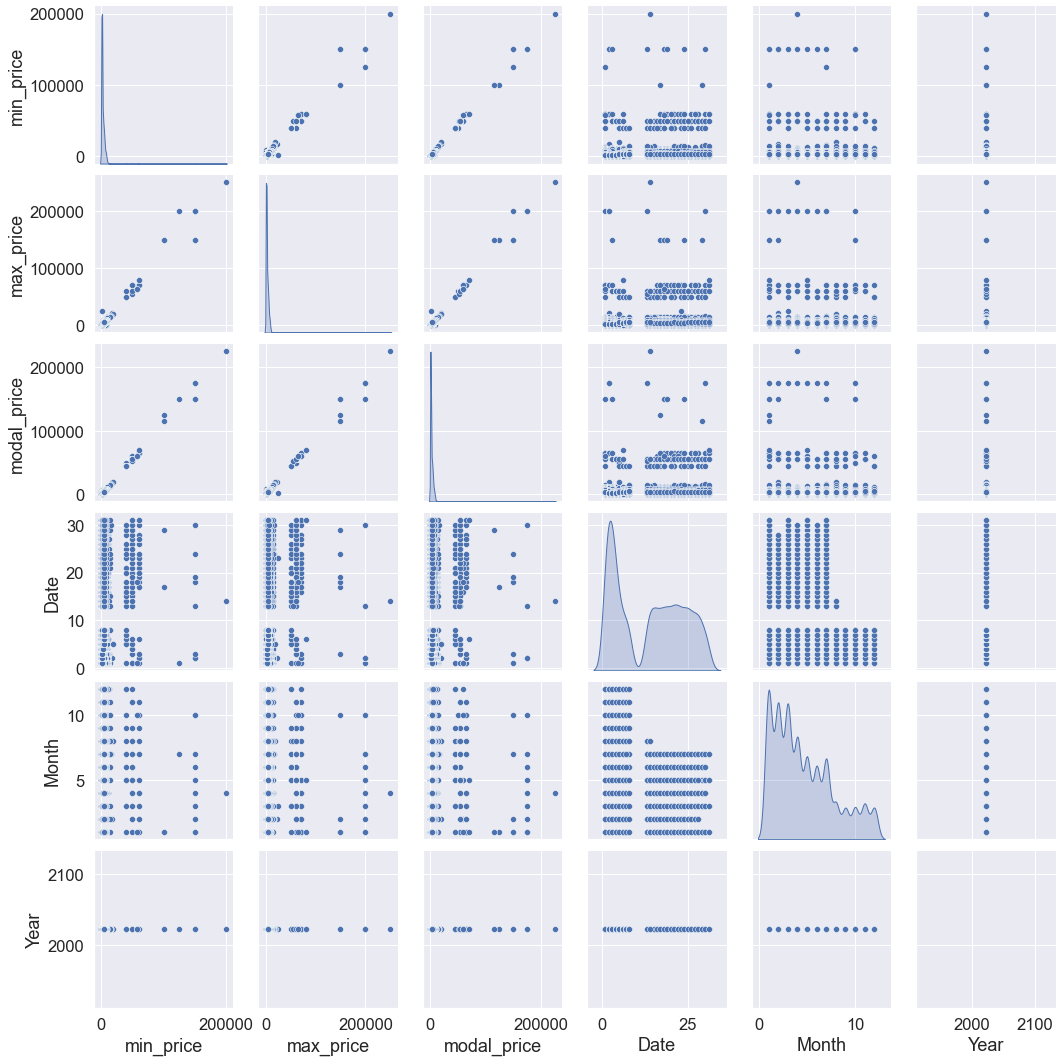

In [151]:
sns.pairplot(df, diag_kind="kde")

 ##### Through pair plotting I also found that all three are linearly dependent to each other.

##### Also from the heatmap I saw there was some relation of prices with months and dates that was given in data. (I didn't consideer year as we had data of onlt this year)

## Graphical Analysis

In [152]:
## Creating a dataframe wrt Months
new_df_m = df.groupby('Month').mean()
new_df_m.head()

,min_price,max_price,modal_price,Date,Year
Month,,,,,
1,2274.097789,2685.749408,2489.841142,18.249145,2022.0
2,2106.547412,2485.605368,2304.609350,16.601386,2022.0
3,2054.823018,2449.788830,2266.363837,17.512231,2022.0
4,2468.201891,2942.322631,2716.319480,14.957849,2022.0
5,2835.776425,3361.549683,3127.090599,14.232586,2022.0


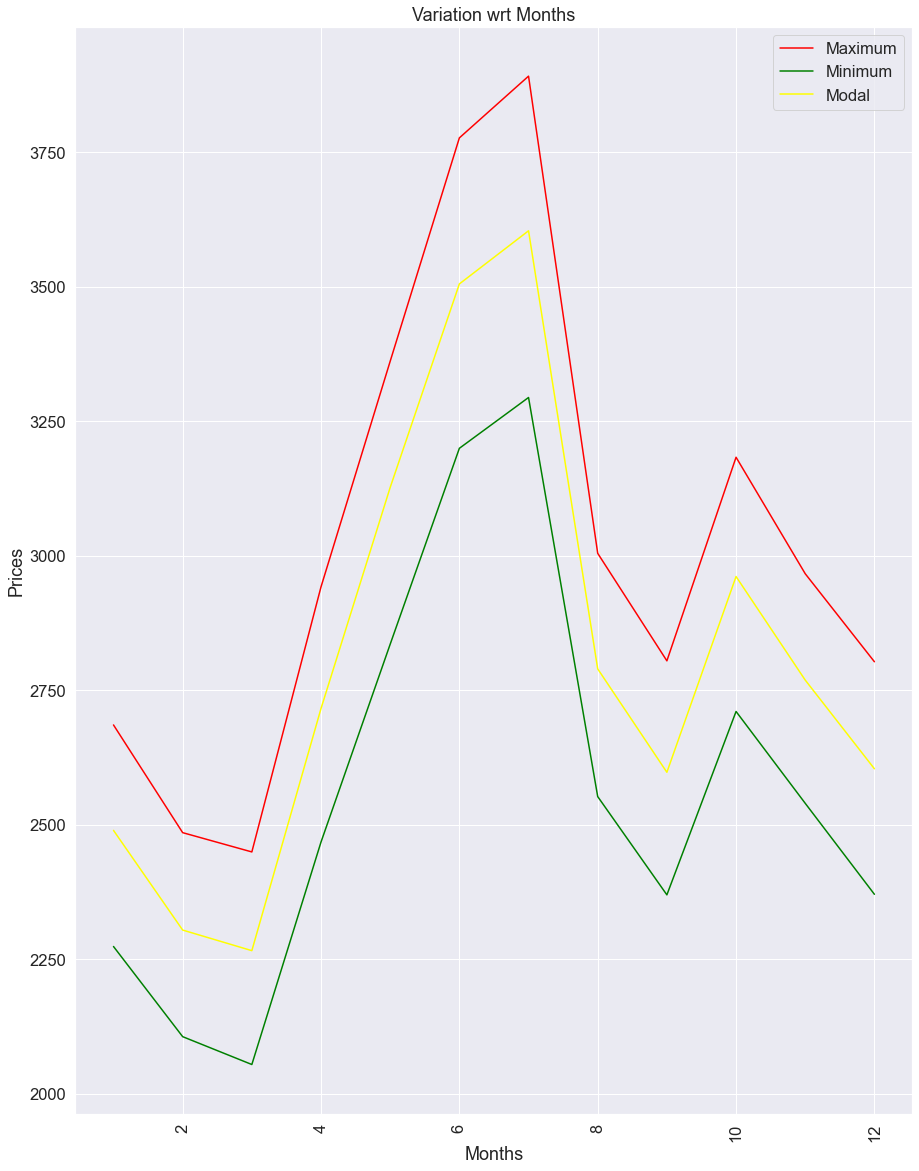

In [153]:
plt.figure(figsize = (15, 20))
plt.xticks(rotation = 90)
plt.plot(new_df_m['max_price'], label = "Maximum", linestyle="-", color = 'red')
plt.plot(new_df_m['min_price'], label = "Minimum", linestyle="-", color = 'green')
plt.plot(new_df_m['modal_price'], label = "Modal", linestyle="-", color = 'yellow')

plt.xlabel('Months')
plt.ylabel('Prices')
plt.title('Variation wrt Months')
plt.legend(loc = 'best')
plt.show()

 ##### On plotting the line graph and comparing I saw that usually on 7th month ie on JULY, the prices of carrot is at its peak while its lowest on 3rd month ie on MARCH after which prices sky rocket.

##### This can be explained by the fact that from 4th to 7th ie from April to July the carrot planting season goes on implying scarcity of carrots. Later as harvesting time starts of different types of carrots, prices starts to fall down.

In [154]:
## Creating a dataframe wrt dates
new_df_dd = df.groupby('Date').mean()
new_df_dd.head()

,min_price,max_price,modal_price,Month,Year
Date,,,,,
1,2400.687297,2837.228649,2632.862432,6.720541,2022.0
2,2242.128624,2699.214129,2479.826797,6.396102,2022.0
3,1901.390385,2237.901586,2077.632016,6.540398,2022.0
4,2112.982171,2519.033677,2332.946513,6.405309,2022.0
5,2690.790343,3182.923761,2956.642313,7.005718,2022.0


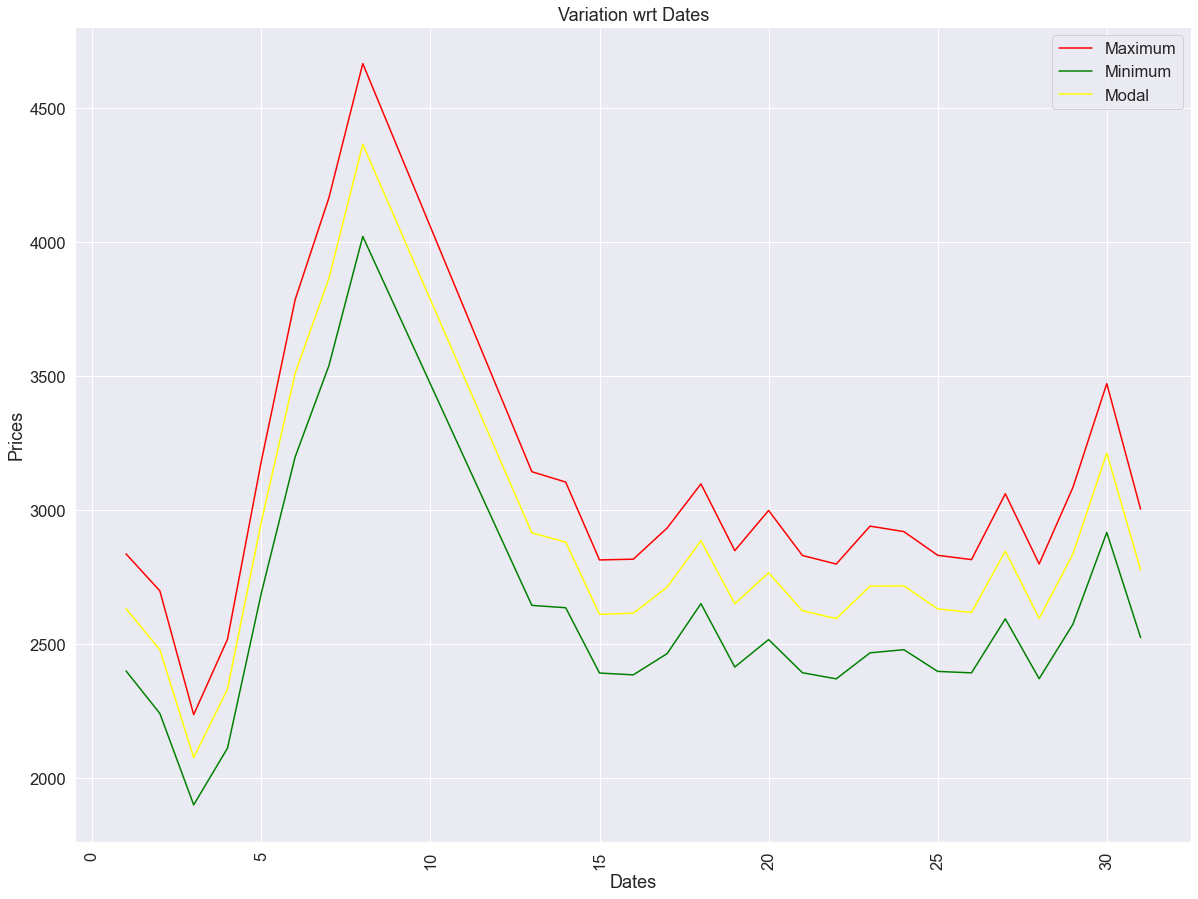

In [155]:
plt.figure(figsize = (20, 15))
plt.xticks(rotation = 90)
plt.plot(new_df_dd['max_price'], label = "Maximum", linestyle="-", color = 'red')
plt.plot(new_df_dd['min_price'], label = "Minimum", linestyle="-", color = 'green')
plt.plot(new_df_dd['modal_price'], label = "Modal", linestyle="-", color = 'yellow')

plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Variation wrt Dates')
plt.legend(loc = 'best')
plt.show()

 ##### On plotting the line graph and comparing I saw that usually from 5th to 10th of months the prices of carrot is at its peak while its lowest on the starting days of the month ie from 1st to 4th after which prices sky rocket. (A trend that we saw in Months as well)

###### To be noted that through heatmap we came to know that prices and month had more relation than that of prices and dates. Therefore, I was able to draw out conclusions from months garph but not that depth conclusions from dates graph.

##### Well, I thought as heatmap didn't show the relation of prices and states and districts, it would be good to explore this angle as well.

In [156]:
## Creating a dataframe wrt states
new_df_s = df.groupby('state').mean()
new_df_s.head()

,min_price,max_price,modal_price,Date,Month,Year
state,,,,,,
Andaman and Nicobar,10058.823529,14039.215686,12058.823529,14.921569,4.098039,2022.0
Andhra Pradesh,2866.666667,4716.666667,3816.666667,9.866667,4.366667,2022.0
Assam,1485.046729,1753.271028,1627.570093,12.560748,4.532710,2022.0
Bihar,1745.900524,2064.520070,1897.923211,14.602094,4.848168,2022.0
Chattisgarh,2299.715026,2550.518135,2424.093264,14.450777,5.251295,2022.0


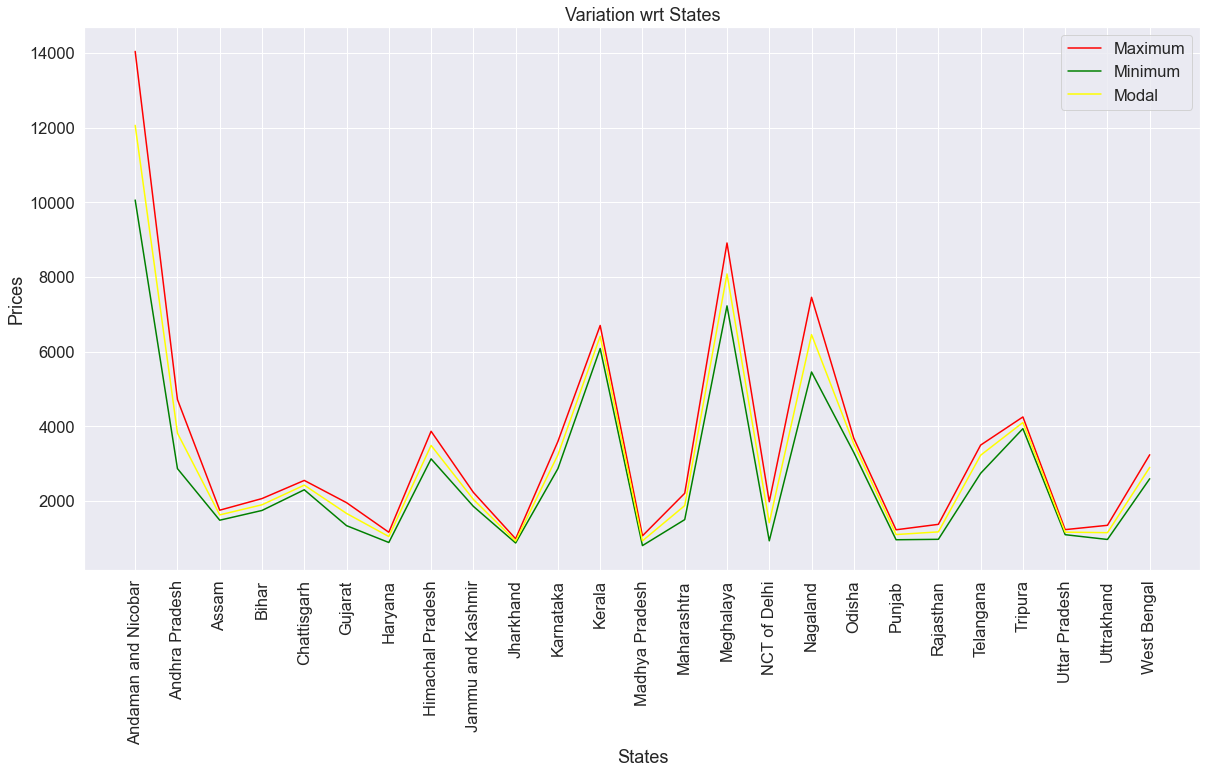

In [157]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.plot(new_df_s['max_price'], label = "Maximum", linestyle="-", color = 'red')
plt.plot(new_df_s['min_price'], label = "Minimum", linestyle="-", color = 'green')
plt.plot(new_df_s['modal_price'], label = "Modal", linestyle="-", color = 'yellow')

plt.xlabel('States')
plt.ylabel('Prices')
plt.title('Variation wrt States')
plt.legend(loc = 'best')
plt.show()

##### I saw that the prices are highest at Andaman and Nicobar, while it is lowest in many states. On observing the states, these states are the states that streches from north to eastern sides(not the costal states).

##### It can be explained as the fact that carrots grow in loamy soil and these type of soil are found in these areas where prices are lower.

##### In Andaman and Nicobar, loamy soil is isn't found so there the prices will be high with relative to others. But the prices here actually sky rockets. This is because the carrots would be needed to be exported here. If it gets exported from near area, the selling is high even though exporting cost is less and if it is exported from the harvesting area, the exporting prices will be more due to the large distances.

In [158]:
## Creating a dataframe wrt districts
new_df_d = df.groupby('district').mean()
new_df_d.head()

,min_price,max_price,modal_price,Date,Month,Year
district,,,,,,
Adilabad,2328.571429,2328.571429,2328.571429,12.285714,6.142857,2022.0
Agra,867.731092,979.663866,922.878151,12.903361,3.689076,2022.0
Ahmedabad,1169.822485,1998.816568,1692.307692,14.597633,5.153846,2022.0
Ahmednagar,1458.482143,2227.232143,1846.205357,13.870536,4.584821,2022.0
Ajmer,918.548387,1879.032258,1406.451613,14.733871,4.459677,2022.0


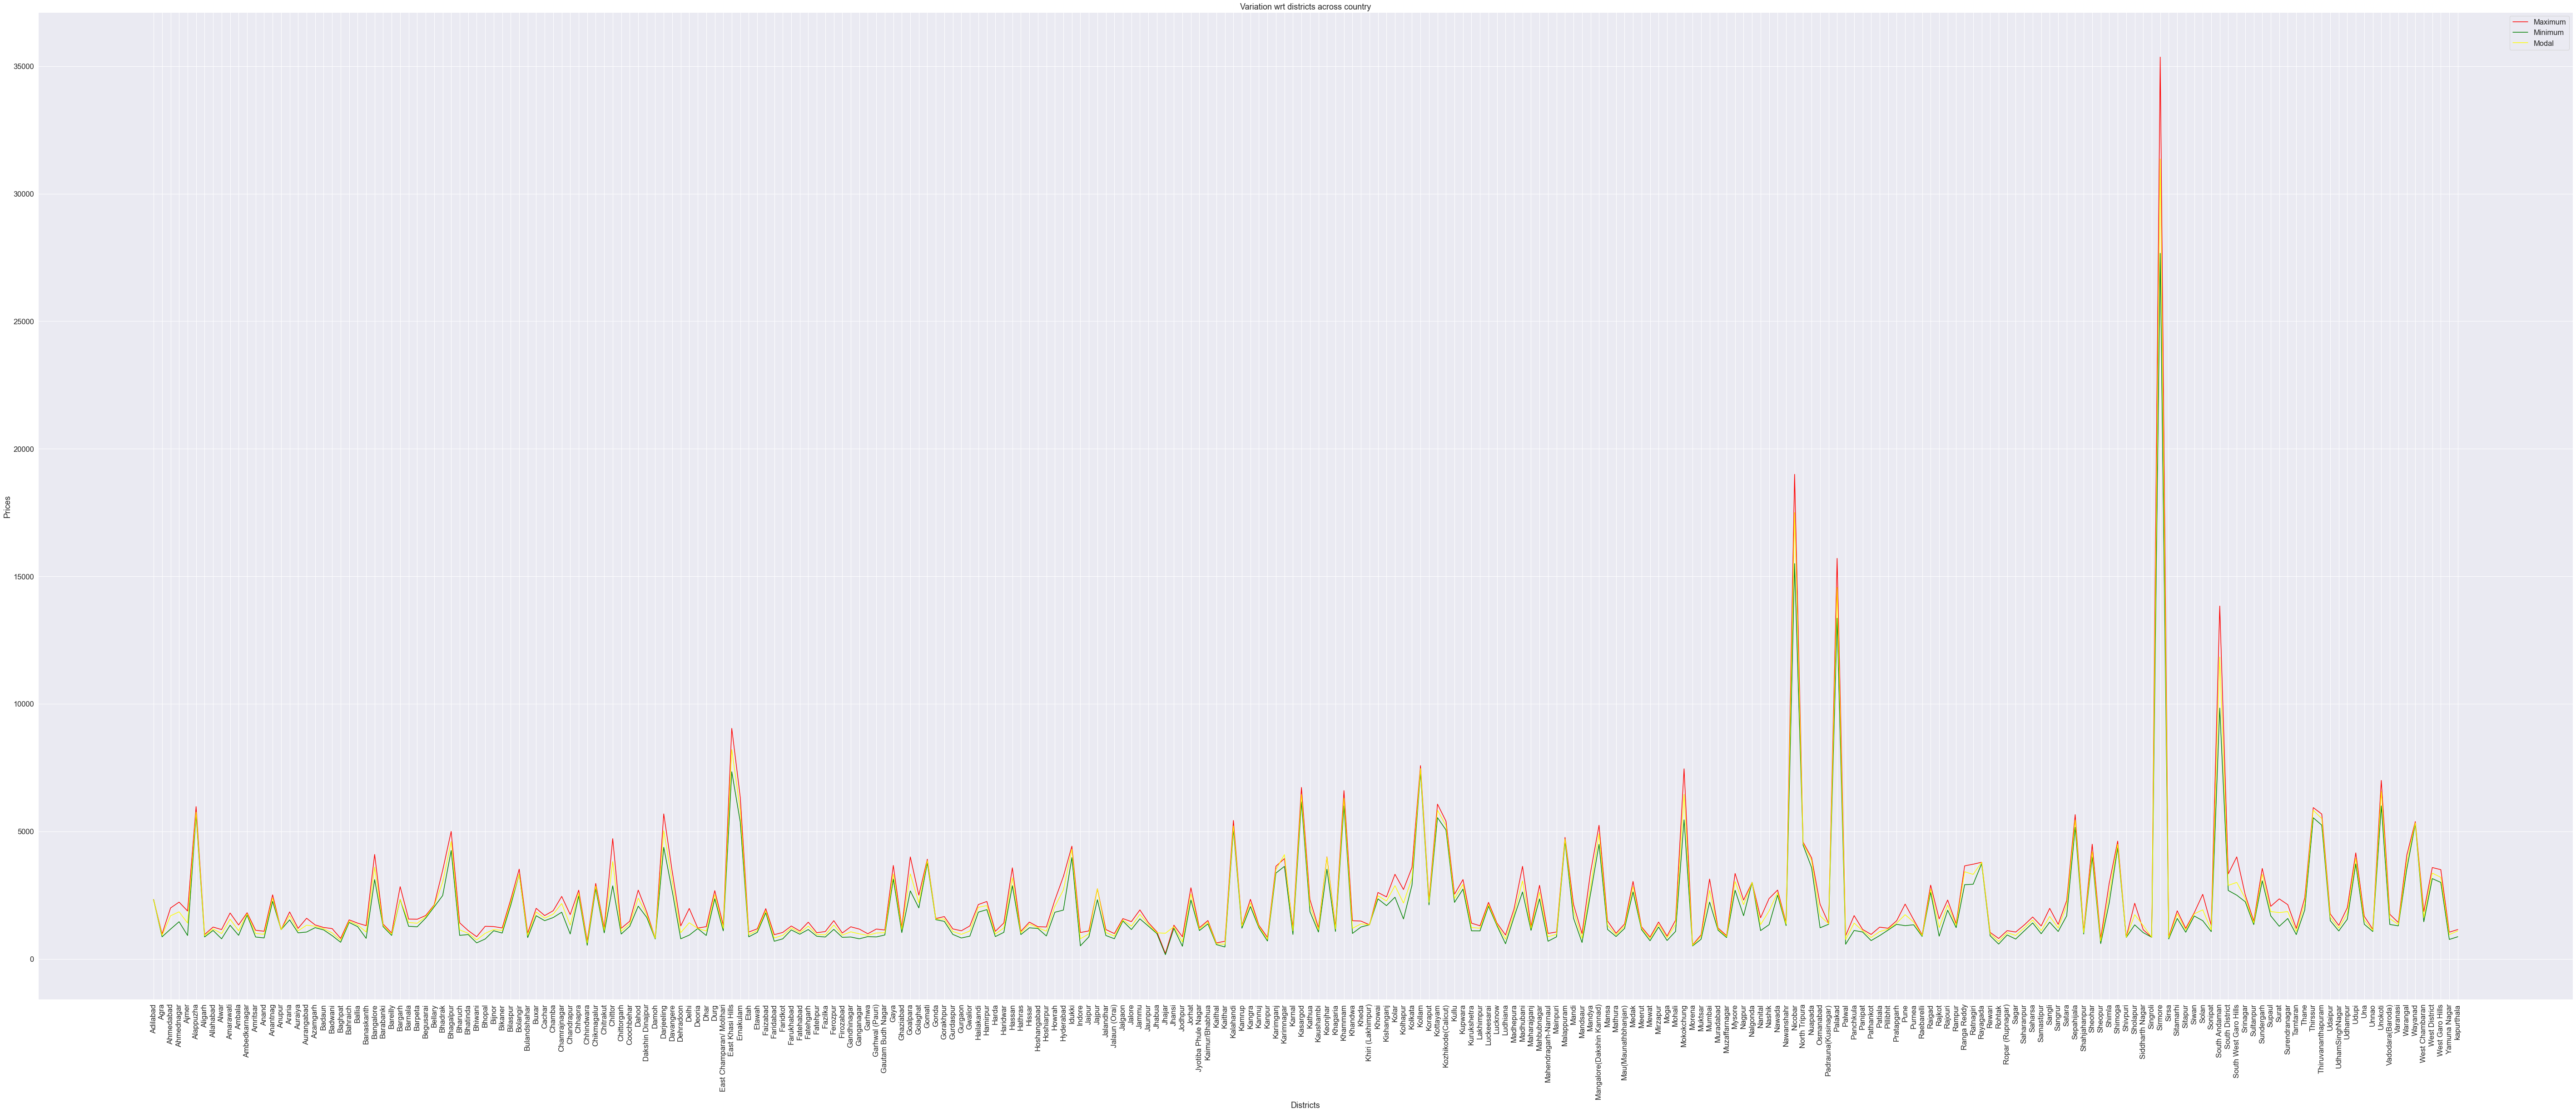

In [159]:
plt.figure(figsize = (100, 40))
plt.xticks(rotation = 90)
plt.plot(new_df_d['max_price'], label = "Maximum", linestyle="-", color = 'red')
plt.plot(new_df_d['min_price'], label = "Minimum", linestyle="-", color = 'green')
plt.plot(new_df_d['modal_price'], label = "Modal", linestyle="-", color = 'yellow')

plt.xlabel('Districts')
plt.ylabel('Prices')
plt.title('Variation wrt districts across country')
plt.legend(loc = 'best')
plt.show()

In [160]:
## To know the highest priced carrot district lies in which state.
df[df["district"] == "Sirmore"]

,state,district,market,commodity,variety,min_price,max_price,modal_price,Date,Month,Year
7839,Himachal Pradesh,Sirmore,Nahan,Carrot,Other,1500.0,2000.0,1750,1,5,2022
7840,Himachal Pradesh,Sirmore,Nahan,Carrot,Other,1200.0,0.0,1500,1,6,2022
7841,Himachal Pradesh,Sirmore,Nahan,Carrot,Other,1000.0,1500.0,1250,1,11,2022
7842,Himachal Pradesh,Sirmore,Nahan,Carrot,Other,1500.0,2000.0,1750,13,1,2022
7843,Himachal Pradesh,Sirmore,Nahan,Carrot,Other,1500.0,2000.0,1750,18,1,2022
...,...,...,...,...,...,...,...,...,...,...,...
7933,Himachal Pradesh,Sirmore,Paonta Sahib,Carrot,Other,2500.0,0.0,3000,16,6,2022
7934,Himachal Pradesh,Sirmore,Paonta Sahib,Carrot,Other,2000.0,3000.0,2500,18,7,2022
7935,Himachal Pradesh,Sirmore,Paonta Sahib,Carrot,Other,2000.0,3500.0,3000,8,1,2022
7936,Himachal Pradesh,Sirmore,Paonta Sahib,Carrot,Other,2000.0,3000.0,2500,8,5,2022


 ##### Through district wise analysis, I found that as expected Andaman and Nicobar districts have very high prices.

##### But one of the odd thing found in graph was that one of the district which wasn't in Andaman and Nicobar had highest of highest prices as see through the graph. On searching, we found that this district is SIRMORE, that lies in HIMACHAL PRADESH. And through logic one can pretty much make out why the prices in Himachal Pradesh was shown higher than its neighbouring states like Punjab, Uttrakhand, Harayana, Delhi etc.

##### On digging it was seen that not only carrots, but many vegetable prices sky rocket in similar way. The reason has something to do with rallies that are held recently. That means this elevation of price here seen may not be always there but is there now for the time the data was collected.

###### In my datasheet, there our current state, Assam wasn't mentioned. So guess we won't be able to know the reason why carrots are given in such low quantity in our mess. XD